<a href="https://colab.research.google.com/github/OKJAHR/diabetes_classification/blob/main/Diyabet_Hastal%C4%B1%C4%9F%C4%B1_S%C4%B1n%C4%B1fland%C4%B1rmas%C4%B1_%5BYSA%5D_201505045.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
# Kütüphaneleri Çağırdık
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

In [51]:
# Verimizi yükleyip çağırdık
data=pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
# Veriyi inceleyelim
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [53]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [55]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [56]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [57]:
data.duplicated().sum()

0

<ipython-input-58-54c25bc56c1a>:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<Axes: >

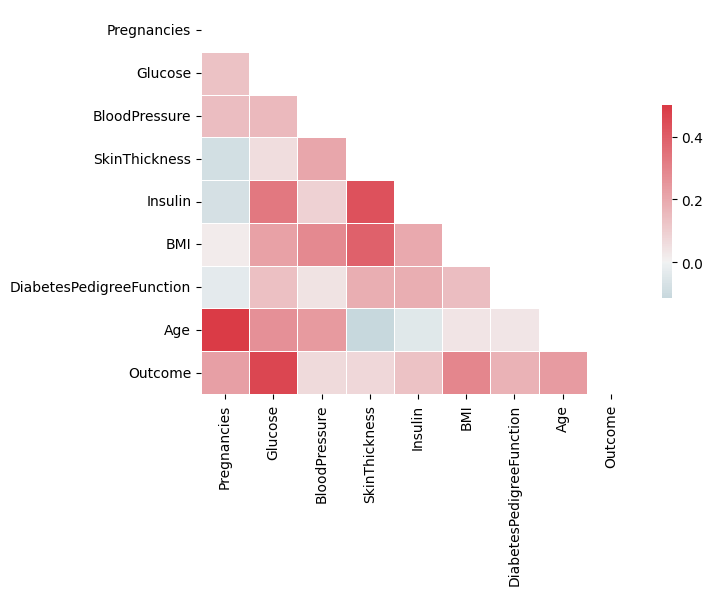

In [58]:
corr=data.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(7, 5))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0, linewidths=.5, cbar_kws={"shrink": .5})

In [59]:
liste=["Diyabeti yok","Diyabeti var"]
diyabet_mi = data["Outcome"].value_counts().tolist()
values = [diyabet_mi[0], diyabet_mi[1]]
fig = px.pie(values=data['Outcome'].value_counts(), names=liste , width=800, height=400, color_discrete_sequence=["black","pink"]
             ,title="Diyabet Hastası Olup Olmaması Arasındaki Yüzde")
fig.show()

In [60]:
plt.figure(figsize=(4,4))

<Figure size 400x400 with 0 Axes>

<Figure size 400x400 with 0 Axes>

In [61]:
fig = px.bar(data['Age'].value_counts(), height=400, width = 700) 
fig.show()

<Axes: xlabel='Glucose', ylabel='Density'>

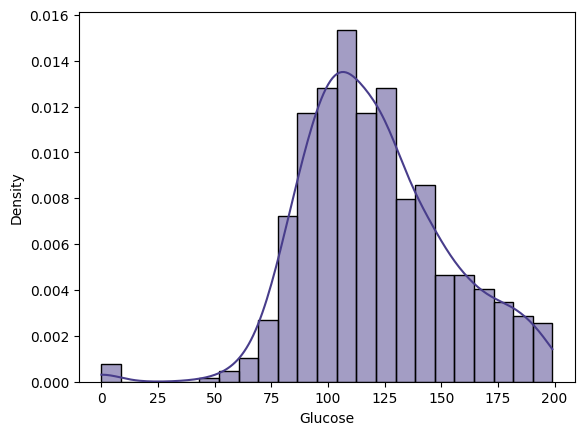

In [62]:
#sns.distplot(data['Glucose'],color ="DarkSlateBlue" )
sns.histplot(data["Glucose"], kde=True,color="DarkSlateBlue",stat="density")

<Axes: xlabel='BloodPressure', ylabel='Density'>

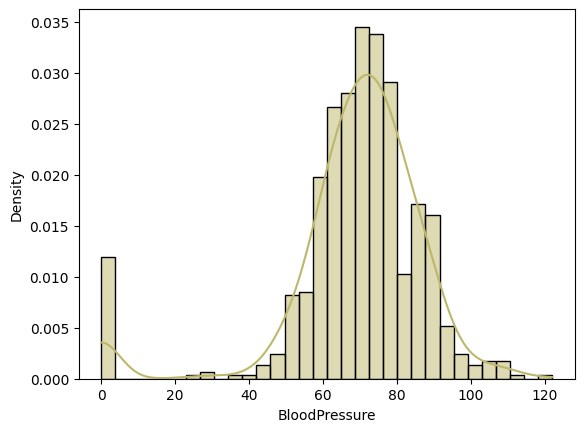

In [63]:
#sns.distplot(data['BloodPressure'], color = 'DarkKhaki')
sns.histplot(data["BloodPressure"], kde=True,color="DarkKhaki",stat="density")

<Axes: xlabel='Insulin', ylabel='Density'>

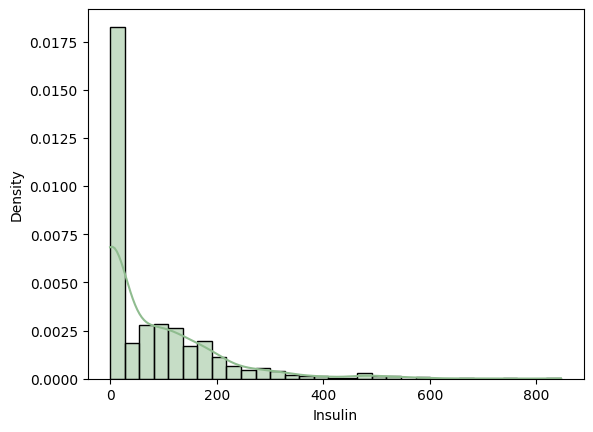

In [64]:
#sns.distplot(data['Insulin'],color ="DarkSeaGreen" )
sns.histplot(data["Insulin"], kde=True,color="DarkSeaGreen",stat="density")

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
x = data.drop(['Outcome'] , axis = 1).values
y = data['Outcome' ].values
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state=42)

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
scaler = MinMaxScaler()

In [69]:
scaler.fit(x_train)

MinMaxScaler()

In [70]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam

In [72]:
#Gerekli modeli kur
model = Sequential()

In [73]:

model.add(Dense(20,activation='relu'))

model.add(Dense(20,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [45]:
model.fit(x_train, y_train,batch_size=10,epochs=200)

Epoch 1/200
62/62 [==============================] - 6s 3ms/step - loss: 0.6766 - accuracy: 0.6221
Epoch 2/200
62/62 [==============================] - 0s 3ms/step - loss: 0.6514 - accuracy: 0.6515
Epoch 3/200
62/62 [==============================] - 0s 3ms/step - loss: 0.6343 - accuracy: 0.6482
Epoch 4/200
62/62 [==============================] - 0s 3ms/step - loss: 0.6153 - accuracy: 0.6612
Epoch 5/200
62/62 [==============================] - 0s 3ms/step - loss: 0.5973 - accuracy: 0.6743
Epoch 6/200
62/62 [==============================] - 0s 3ms/step - loss: 0.5804 - accuracy: 0.6840
Epoch 7/200
62/62 [==============================] - 0s 3ms/step - loss: 0.5657 - accuracy: 0.7003
Epoch 8/200
62/62 [==============================] - 0s 3ms/step - loss: 0.5559 - accuracy: 0.7150
Epoch 9/200
62/62 [==============================] - 0s 3ms/step - loss: 0.5488 - accuracy: 0.7036
Epoch 10/200
62/62 [==============================] - 0s 4ms/step - loss: 0.5381 - accuracy: 0.7215
Epoch 11/

<Axes: >

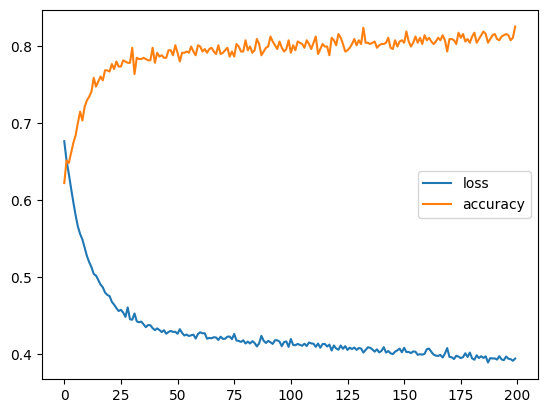

In [46]:
model_hist = pd.DataFrame(model.history.history)
model_hist.plot()

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [48]:
prediction = model.predict(x_test)
prediction  = [1 if y>=0.5 else 0 for y in prediction] 


5/5 [==============================] - 0s 2ms/step


In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        99
           1       0.64      0.62      0.63        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154

